## Clustering the Countries by using Unsupervised Learning for HELP International

In [185]:
# import neccessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from summarytools import dfSummary
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA


Objective:
* To categorise the countries using socio-economic and health factors that determine the overall development of the country.

In [186]:
df = pd.read_csv("country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [187]:
print("Shape of the dataset: ", df.shape)
print("Duplicate values: ", df.duplicated().sum())
print("The number of null/nan values for each column: ")
print(df.isna().sum())


Shape of the dataset:  (167, 10)
Duplicate values:  0
The number of null/nan values for each column: 
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [188]:

print(f"The number of unique values for each column: ")
print(df.nunique())

The number of unique values for each column: 
country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64


In [189]:
print("Dataset Info: ")
print(df.info())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [190]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,country[object],1. Afghanistan2. Albania3. Algeria4. Angola5. Antigua and Barbuda6. Argentina7. Armenia8. Australia9. Austria10. Azerbaijan11. other,1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)1 (0.6%)157 (94.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfElEQVR4nO3cMW4aUQBF0Y+FrLgZhJBYDIvwYrMIdoMQU8SWG1KElA6Wk1wUck6VIsUUV8Pk678szufzgMLDrR+A/4fYyIiNjNjIiI2M2MiIjYzYyIiNzGKM8TTGGOfz+eXGz8KdW242m+cxxlgsFl8Fx9/0ME3Tepqm9Rjj8dYPw33zzUZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZJbzPB8vf3676ZNw92wQyCz8l1lUvNnIWFeRsa4i4+iDjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZ18LJGLyQ8WYjY/BCxuCFjKMPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kXAsnY/BCxjcbGT+jZKyryFhXkfHNRkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjGvhZKyryHizkTF4IWPwQsbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IePNRsbghYzBCxlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxrqKjA0CGesqMt5sZKyryFhXkXH0QUZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGxuCFjGvhZAxeyHizkTF4IWPwQsbRBxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMq6FkzF4IeObjYyfUTLWVWSsq8j4ZiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca1cDLWVWS82cgYvJAxeCHj6IOM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxnXwskYvJD5+WZzJZzf9Xbt13G52WyeLxsE+LR5no/XRlPLaZrWu93uZbVavZYPx/04nU5f9vv9+nA4PI4x3o9tjDFWq9Xrdrv9lj0d9+jp2l9wzkZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZmOcaPKyK3fhD+XR/tZznP83G/36/HB66IwHsuw6lfjqZcC+dPuXot3OCFjH8gkBEbGbGRERsZsZERGxmxkREbGbGR+Q6r/BAn38TSMAAAAABJRU5ErkJggg=="">",0(0.0%)
2,child_mort[float64],Mean (sd) : 38.3 (40.3)min < med < max:2.6 < 19.3 < 208.0IQR (CV) : 53.9 (0.9),139 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3dsVPaYBjH8ecFpUEgObDi5tLN3nVgdG/H/rH+EVkZ6tClk4vnXY5LaoQjl6ZDaxe1wBsRfvH7mX3eZPgG3rwMuqqqDNh3rV3fALCOg1V/4JzrmlnHc/1lVVVzz1ngn/+G6pzrHh8ffw3DcOizeJZlM+fcJbGirlWfqJ0wDIcXFxfzKIoWmyycpmkQx/EwSZKOmREqaln51W9mFkXRYjwe33us3/WYAR7hZQoSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUS1vo36L7Ksjw0s9A557vEsqqq+QveEkRtLdQ8zw+Lovh0dnbWbrfbC581siybOecuiRVbC3W5XB4EQXA0mUwWp6ens03n0zQN4jgeJknSMTNCfeO2+tVvZtbr9Rbj8fjeZ7Ysy9D8tw5sGxpk66H6qrt1YNvQLHsbap2tA9uG5tnbUB/U2Dp0X/xmsDOco0ICoUICoULC3u9Rfb3Ar2ItM/u1g1mO1Z7QyFDrHm2VZXmY5/mHfr//o9VqFa81a8ax2nMaGWrdX8Wur6+HV1dXJ5PJ5Pum83VmOVZ7XiNDfeB7tDWbzbq+83Vm/+JY7Qm8TEFCoz9R3yLnXNfMOp7je/siR6h7puZpRTAajb5EUdTzGa77IrfNh2StUNM0DTa96t3dXWBmlud5cHt7e/Sa86rXvrm5GdQ5rSiKIjCzj+fn598Gg8HPTWbn8/m76XR6kiTJe+dctum17c9D8jmKor7H7MqH5Dcq4iqx7tOurQAAAABJRU5ErkJggg=="">",0(0.0%)
3,exports[float64],Mean (sd) : 41.1 (27.4)min < med < max:0.1 < 35.0 < 200.0IQR (CV) : 27.5 (1.5),147 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACf0lEQVR4nO3dO2/aUBiH8fdAiMyltgAJNpaOlTpkzN61H7Zrtw58AtZMLAgJcRFuEMbQocrUiIsPhPN3n99+bEd6RGxy8todDgcDQle59wUA53i45cGdc3Uze/Q4xPZwOLxe63qg62ahOufq3W73exzH7aLHWK1Wc+fcD2LFLT9RH+M4bj8/P78mSbK5dPFyuYyGw2F7Nps9mhmh/udu+qvfzCxJkk2v1/tdcHn9qhcDWTxMQQKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQsLNZ0/5yPO8Zmaxc67IckZWlkiwoaZpWsuy7OtgMKhWq9WLpwEysrJcgg11u90+RFHUeHp62vT7/fklaxlZWT7Bhvqm2WwWHVvJyMoS4WEKEggVEggVEggVEk4+THm8gife7/e1AuuAfxwN1ecVPFmWRXmef9lsNr/MrOjLJgAzO/2JWvgVPOPxuD0ajRq73a7qcX2AmZ35PWqRV/DM53O+x8TV8DAFCYQKCYQKCYQKCcFvSinKcy+rGftZg1LKUH33spqxnzU0pQzVZy+rGftZQ1TKUN947GU1Yz9rUHiYggRChQRChQRChQRChQRChQR

[]

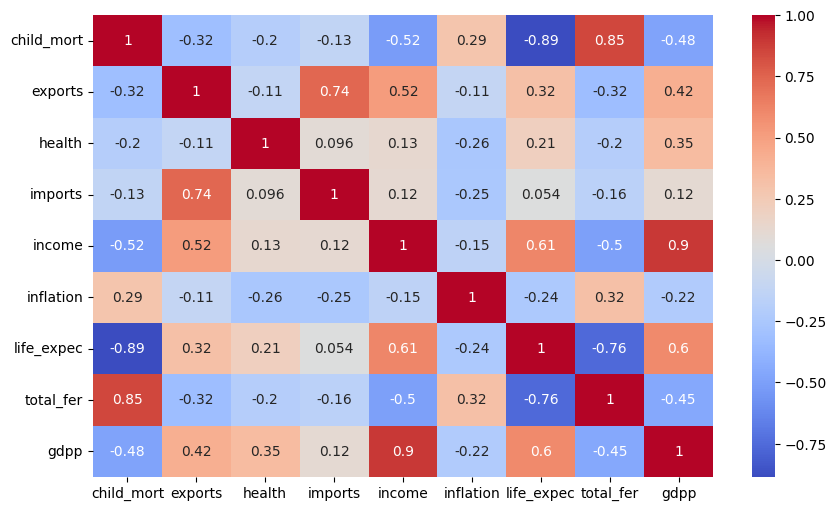

In [191]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.plot()

These are the following features which have strong correleation between them.
* income with gdpp (0.9)
* child_mortality with total fertitlity
* child_mortality with life expectency

In [192]:
# Preprocessing
scaler = StandardScaler()
# Exclude the 'country' column
data_scaled = scaler.fit_transform(df.iloc[:, 1:])

In [193]:
data_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### K-Means Clustering

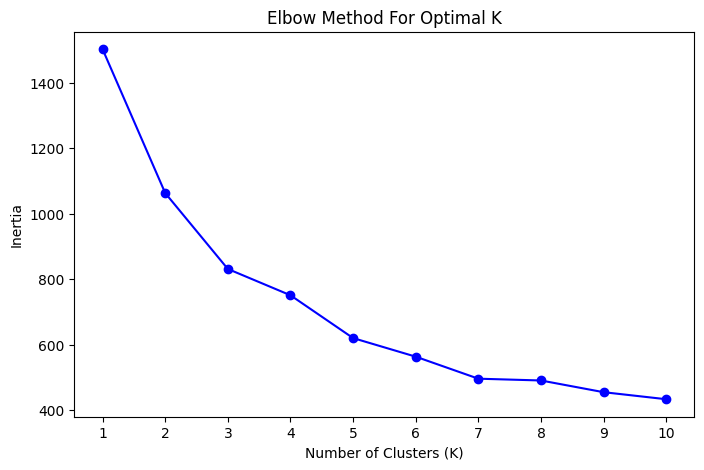

In [194]:
# Elbow Method
scaled_df = data_scaled
def plot_elbow_method(data, max_k=10):
    inertia = []
    K_range = range(1, max_k+1)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertia, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal K')
    plt.xticks(K_range)
    plt.show()

plot_elbow_method(scaled_df)

K=2, Silhouette Score=0.2663
K=3, Silhouette Score=0.2856
K=4, Silhouette Score=0.2880
K=5, Silhouette Score=0.3009
K=6, Silhouette Score=0.2357
K=7, Silhouette Score=0.2479
K=8, Silhouette Score=0.2020
K=9, Silhouette Score=0.1923
K=10, Silhouette Score=0.1962


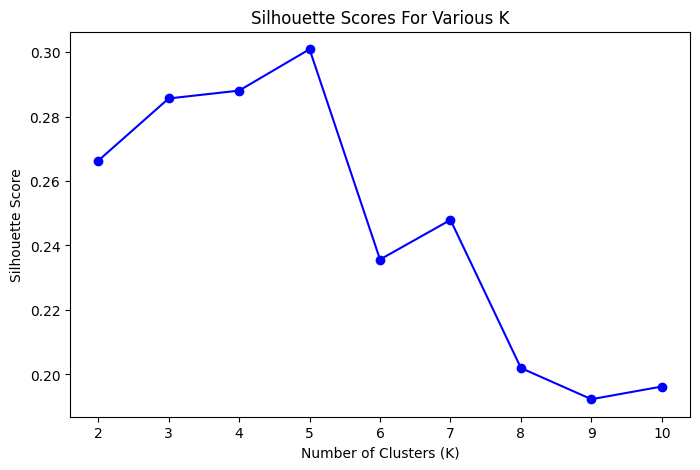

In [195]:
# Silhouette Score
def plot_silhouette_scores(data, max_k=10):
    silhouette_avgs = []
    K_range = range(2, max_k+1) 
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_avgs.append(silhouette_avg)
        print(f'K={k}, Silhouette Score={silhouette_avg:.4f}')
    
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, silhouette_avgs, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores For Various K')
    plt.xticks(K_range)
    plt.show()

plot_silhouette_scores(scaled_df)

Silhouette Score values closer to 1 indicate better-defined clusters

Davies-Bouldin Index measures the ratio of within-cluster scatter to between-cluster separation. Lower values indicate better clustering.

In [196]:
# K-Means Clustering with best k
kmeans = KMeans(n_clusters=5, random_state=42) 
clusters = kmeans.fit_predict(data_scaled)
df['KMeans'] = clusters

# Evaluate
sil_score = silhouette_score(data_scaled, df['KMeans'])
print(f"Silhouette Score for K-Means: {sil_score:.2f}")
db_index = davies_bouldin_score(data_scaled, df['KMeans'])
print(f"db_index for K-Means: {db_index:.4f}")

Silhouette Score for K-Means: 0.30
db_index for K-Means: 0.8671


In [197]:
clustering_results = []
x = {}
x["Technique"] = "K-Means"
x["Silhouette Score"] = float(round(sil_score, 3))
x["DB Index"] = float(round(db_index, 3))
clustering_results.append(x)
clustering_results

[{'Technique': 'K-Means', 'Silhouette Score': 0.301, 'DB Index': 0.867}]

### Hierarchical Clustering

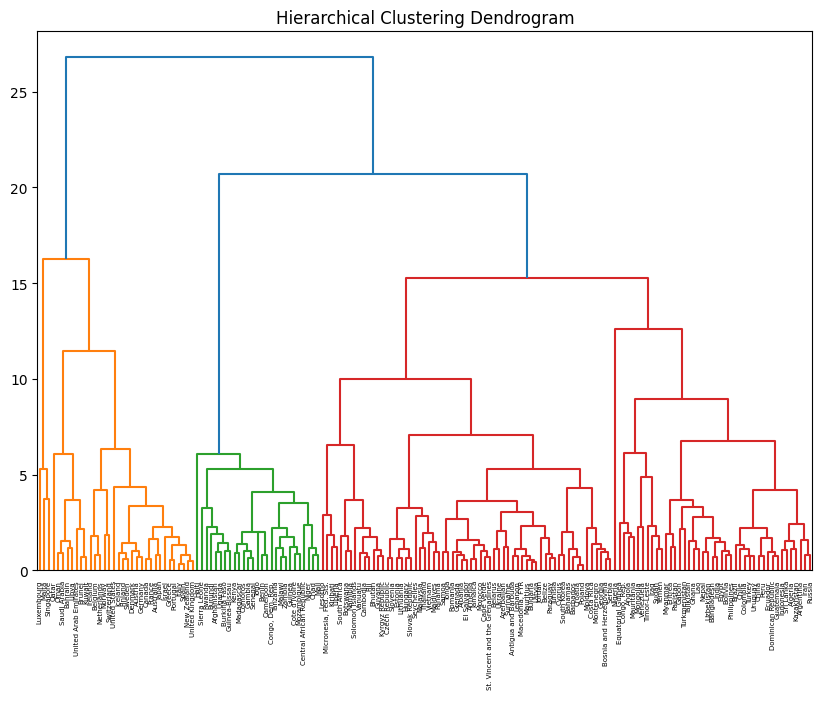

In [198]:
# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward')  

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df['country'].values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel(' ')
plt.show()

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters = agglo.fit_predict(data_scaled)

# Add cluster labels
df['Hierarchical_Clustering'] = clusters


In [199]:
# Compute silhouette score
sil_score = silhouette_score(data_scaled, df['Hierarchical_Clustering'])
print(f"Silhouette Score for Hierarchical_Clustering: {sil_score:.4f}")

db_index = davies_bouldin_score(data_scaled, df['Hierarchical_Clustering'])
print(f"db_index for Hierarchical_Clustering: {db_index:.4f}")

Silhouette Score for Hierarchical_Clustering: 0.3153
db_index for Hierarchical_Clustering: 1.3273


In [200]:
x = {}
x["Technique"] = "Hierarchical Clustering"
x["Silhouette Score"] = float(round(sil_score, 3))
x["DB Index"] = float(round(db_index, 3))
clustering_results.append(x)
clustering_results

[{'Technique': 'K-Means', 'Silhouette Score': 0.301, 'DB Index': 0.867},
 {'Technique': 'Hierarchical Clustering',
  'Silhouette Score': 0.315,
  'DB Index': 1.327}]

### DBSCAN

In [201]:
# Evaluate DBSCAN with different parameters
eps_values = [0.5, 1.0, 1.5, 2, 2.5]
min_samples_values = [5, 10, 15]

results = []
for eps in eps_values:
    for min_samples in min_samples_values:
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_scaled)
        
        # Ignore cases with all points in one cluster
        if len(np.unique(clusters)) > 1:
            sil_score = silhouette_score(data_scaled, clusters)
            db_index = davies_bouldin_score(data_scaled, clusters)
            results.append({'eps': eps, 'min_samples': min_samples, 
                            'silhouette_score': sil_score, 'db_index': db_index})
        else:
            results.append({'eps': eps, 'min_samples': min_samples, 
                            'silhouette_score': None, 'db_index': None})

results_df = pd.DataFrame(results)
print(results_df)


    eps  min_samples  silhouette_score  db_index
0   0.5            5               NaN       NaN
1   0.5           10               NaN       NaN
2   0.5           15               NaN       NaN
3   1.0            5         -0.024819  1.908956
4   1.0           10         -0.145783  2.329716
5   1.0           15               NaN       NaN
6   1.5            5          0.288296  3.780838
7   1.5           10          0.253223  3.705569
8   1.5           15          0.180731  2.612438
9   2.0            5          0.403244  3.044032
10  2.0           10          0.385146  3.187648
11  2.0           15          0.368869  3.223391
12  2.5            5          0.557682  2.072500
13  2.5           10          0.530657  2.279627
14  2.5           15          0.530657  2.279627


In [202]:
best_eps = float(results_df.iloc[results_df["silhouette_score"].idxmax()]["eps"])
best_minsamples = int(results_df.iloc[results_df["silhouette_score"].idxmax()]["min_samples"])
best_minsamples

5

In [203]:
# DBSCAN with best values of eps and min_sample
a = results_df["silhouette_score"].idxmax()
dbscan = DBSCAN(eps=best_eps, min_samples=best_minsamples)
clusters = dbscan.fit_predict(data_scaled)
df['DBSCAN'] = clusters
        

In [204]:
# Compute silhouette score
sil_score = silhouette_score(data_scaled, df['DBSCAN'])
print(f"Silhouette Score for DBSCAN: {sil_score:.4f}")

db_index = davies_bouldin_score(data_scaled, df['DBSCAN'])
print(f"db_index for DBSCAN: {db_index:.4f}")

Silhouette Score for DBSCAN: 0.5577
db_index for DBSCAN: 2.0725


In [205]:
x = {}
x["Technique"] = "DBSCAN"
x["Silhouette Score"] = float(round(sil_score, 3))
x["DB Index"] = float(round(db_index, 3))
clustering_results.append(x)
clustering_results

[{'Technique': 'K-Means', 'Silhouette Score': 0.301, 'DB Index': 0.867},
 {'Technique': 'Hierarchical Clustering',
  'Silhouette Score': 0.315,
  'DB Index': 1.327},
 {'Technique': 'DBSCAN', 'Silhouette Score': 0.558, 'DB Index': 2.072}]

### PCA with K-Means

In [211]:
# Evaluate K-Means with different numbers of clusters
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
cluster_options = [2, 3, 4, 5, 6, 7, 8, 9, 10]  

results = []
for n_clusters in cluster_options:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_pca)

    # Evaluate clustering
    silhouette_avg = silhouette_score(data_pca, clusters)
    db_index = davies_bouldin_score(data_pca, clusters)

    results.append({'n_clusters': n_clusters, 
                    'silhouette_score': silhouette_avg, 
                    'davies_bouldin_score': db_index})

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

   n_clusters  silhouette_score  davies_bouldin_score
0           2          0.414007              0.877758
1           3          0.378607              0.972576
2           4          0.377946              0.840646
3           5          0.375407              0.801118
4           6          0.379744              0.774547
5           7          0.358475              0.780326
6           8          0.336764              0.841259
7           9          0.332995              0.842137
8          10          0.316397              0.825842


In [210]:
print(results_df.loc[results_df['silhouette_score'].idxmax(), 'n_clusters'])

2


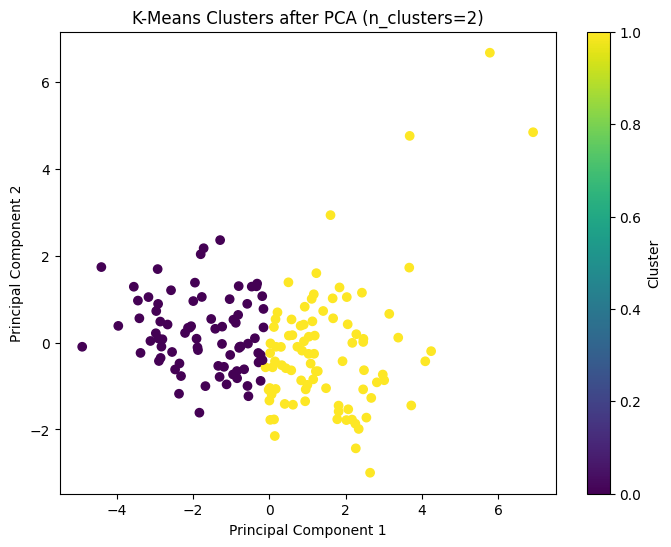

In [212]:
# Select the best cluster size (e.g., based on silhouette score)
best_n_clusters = results_df.loc[results_df['silhouette_score'].idxmax(), 'n_clusters']

# Apply K-Means with the best parameter
kmeans_best = KMeans(n_clusters=int(best_n_clusters), random_state=42)
best_clusters = kmeans_best.fit_predict(data_pca)
df['PCA+KMeans'] = best_clusters

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=best_clusters, cmap='viridis', marker='o')
plt.title(f"K-Means Clusters after PCA (n_clusters={int(best_n_clusters)})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [213]:
# Compute silhouette score
sil_score = silhouette_score(data_pca, df['PCA+KMeans'])
print(f"Silhouette Score for PCA_KMeans: {sil_score:.4f}")

db_index = davies_bouldin_score(data_pca, df['PCA+KMeans'])
print(f"db_index for PCA_KMeans: {db_index:.4f}")

Silhouette Score for PCA_KMeans: 0.4140
db_index for PCA_KMeans: 0.8778


In [221]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans,Hierarchical_Clustering,DBSCAN,PCA+KMeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0,0,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0,0,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,0,0,0


In [214]:
x = {}
x["Technique"] = "PCA+K-Means"
x["Silhouette Score"] = float(round(sil_score, 3))
x["DB Index"] = float(round(db_index, 3))
clustering_results.append(x)
clustering_results

[{'Technique': 'K-Means', 'Silhouette Score': 0.301, 'DB Index': 0.867},
 {'Technique': 'Hierarchical Clustering',
  'Silhouette Score': 0.315,
  'DB Index': 1.327},
 {'Technique': 'DBSCAN', 'Silhouette Score': 0.558, 'DB Index': 2.072},
 {'Technique': 'PCA+K-Means', 'Silhouette Score': 0.414, 'DB Index': 0.878}]

In [215]:
# Convert the list to a DataFrame
results_df = pd.DataFrame(clustering_results)

# Display the results
print(results_df)


                 Technique  Silhouette Score  DB Index
0                  K-Means             0.301     0.867
1  Hierarchical Clustering             0.315     1.327
2                   DBSCAN             0.558     2.072
3              PCA+K-Means             0.414     0.878


### Conclusion
* If Silhouette Score is prioritized, choose DBSCAN.
* If we want a balanced approach, we can use PCA+K-Means.

In [222]:
df[['country', 'DBSCAN']].head(10)

,country,DBSCAN
0,Afghanistan,0
1,Albania,0
2,Algeria,0
3,Angola,0
4,Antigua and Barbuda,0
5,Argentina,0
6,Armenia,0
7,Australia,0
8,Austria,0
9,Azerbaijan,0


In [223]:
df[['country', 'PCA+KMeans']].head(10)

,country,PCA+KMeans
0,Afghanistan,0
1,Albania,1
2,Algeria,0
3,Angola,0
4,Antigua and Barbuda,1
5,Argentina,1
6,Armenia,1
7,Australia,1
8,Austria,1
9,Azerbaijan,0
